In [57]:
import numpy as np
import matplotlib.pyplot as plt

def compute_acceleration(x, x_others, m_others, G=1.0):
    # Convert m_others to a NumPy array
    m_others = np.array(m_others)

    # Compute acceleration for one body due to all other bodies
    r = x_others - x  # Compute relative positions
    r_norm = np.linalg.norm(r, axis=1)  # Compute norms along the first axis (across bodies)
    r_unit = r / r_norm[:, np.newaxis]  # Unit vectors
    acc = G * np.sum(m_others[:, np.newaxis] * r_unit / (r_norm**2)[:, np.newaxis], axis=0)
    return acc


def rk4_step(x, v, m, x_others, m_others, dt):
    k1v = dt * compute_acceleration(x, x_others, m_others)
    k1x = dt * v
    k2v = dt * compute_acceleration(x + 0.5 * k1x, x_others, m_others)
    k2x = dt * (v + 0.5 * k1v)
    k3v = dt * compute_acceleration(x + 0.5 * k2x, x_others, m_others)
    k3x = dt * (v + 0.5 * k2v)
    k4v = dt * compute_acceleration(x + k3x, x_others, m_others)
    k4x = dt * (v + k3v)

    v_new = v + (1/6) * (k1v + 2*k2v + 2*k3v + k4v)
    x_new = x + (1/6) * (k1x + 2*k2x + 2*k3x + k4x)

    return x_new, v_new

def simulate_n_body_system(t0, tf, h, initial_conditions):
    num_bodies = len(initial_conditions)
    dimensions = initial_conditions[0]['x0'].shape[0]

    timesteps = int((tf - t0) / h) + 1
    t = np.linspace(t0, tf, timesteps)

    # Arrays to store positions and velocities
    x = np.zeros((timesteps, num_bodies, dimensions))
    v = np.zeros((timesteps, num_bodies, dimensions))

    # Initialize positions and velocities
    for i, body in enumerate(initial_conditions):
        x[0, i] = body['x0']
        v[0, i] = body['v0']

    # RK4 integration loop
    for i in range(1, timesteps):
        for j in range(num_bodies):
            x_other = np.delete(x[i-1], j, axis=0)  # Remove the j-th body's position
            m_other = [body['mass'] for idx, body in enumerate(initial_conditions) if idx != j]  # Collect masses of other bodies
            x[i, j], v[i, j] = rk4_step(x=x[i-1, j], v=v[i-1, j],
                                        m=initial_conditions[j]['mass'],
                                        x_others=x_other,
                                        m_others=m_other,
                                        dt=h)

    return x, t


def plot_simulation(x_traj):
    plt.figure(figsize=(8, 6))
    for i in range(x_traj.shape[1]):
        plt.plot(x_traj[:, i, 0], x_traj[:, i, 1],
                     label=f'Body {i+1}')
        plt.plot(x_traj[0, i, 0], x_traj[0, i, 1], marker='o',
                 linestyle='None',
                 color=plt.gca().lines[-1].get_color(), # last used color
                 label=f'Body {i+1} start')

    plt.title(f'{x_traj.shape[1]}-Body Orbit Simulation using RK4')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(bbox_to_anchor=(1.05, 0.9))
    plt.grid(True)
    plt.show()

def run_simulation(t0, tf, h, initial_conditions):
    print(f'initial_conditions: \n{initial_conditions}')
    x_traj, time = simulate_n_body_system(t0, tf, h, initial_conditions)
    plot_simulation(x_traj)
    return x_traj, time

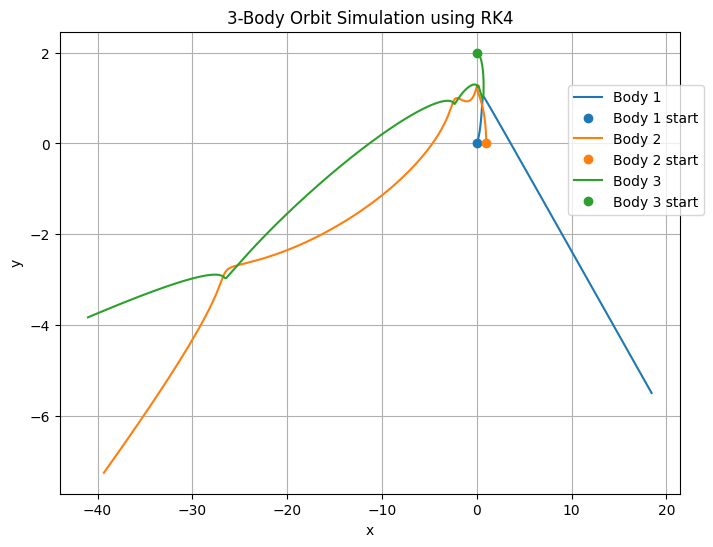

In [35]:
# Example usage:
initial_conditions = [
    {'x0': np.array([0.0, 0.0]), 'v0': np.array([0.0, 0.0]), 'mass': 1.0},
    {'x0': np.array([1.0, 0.0]), 'v0': np.array([0.0, 1.0]), 'mass': 0.5},
    {'x0': np.array([0.0, 2.0]), 'v0': np.array([0.5, 0.0]), 'mass': 0.8},
]

t0, tf, h = 0.0, 10.0, 0.01
x_traj, time = run_simulation(t0, tf, h, initial_conditions)


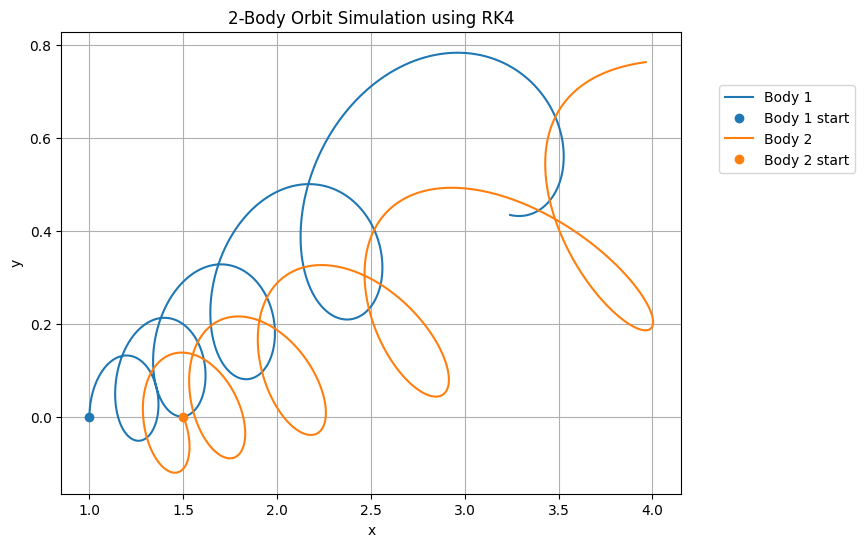

In [36]:
initial_conditions = [
    {'x0': np.array([1.0, 0.0]), 'v0': np.array([0.0, 0.5]), 'mass': 1.0},
    {'x0': np.array([1.5, 0.0]), 'v0': np.array([0.5, -0.5]), 'mass': 0.8},
]

t0, tf, h = 0.0, 10.0, 0.001
x_traj, time = run_simulation(t0, tf, h, initial_conditions)


initial_conditions: 
[{'x0': array([-1.25459881,  4.50714306]), 'v0': array([1.15996971, 0.49329242]), 'mass': 0.5780093202212182}, {'x0': array([-3.4400548 , -4.41916388]), 'v0': array([1.83088073, 0.50557506]), 'mass': 0.8540362888980227}, {'x0': array([-4.79415506,  4.69909852]), 'v0': array([ 1.6622132 , -1.43830445]), 'mass': 0.5909124836035503}, {'x0': array([-3.1659549 , -1.95757757]), 'v0': array([ 0.12378216, -0.34027491]), 'mass': 0.645614570099021}, {'x0': array([ 1.11852895, -3.60506139]), 'v0': array([-1.03927676, -0.66819078]), 'mass': 0.728034992108518}, {'x0': array([ 2.85175961, -3.00326218]), 'v0': array([0.07117219, 0.46207284]), 'mass': 0.5232252063599989}, {'x0': array([ 1.07544852, -3.29475876]), 'v0': array([-2.17474204,  2.24442769]), 'mass': 0.9828160165372797}, {'x0': array([ 3.08397348, -1.95386231]), 'v0': array([-2.01163943,  0.92116513]), 'mass': 0.7200762468698007}]


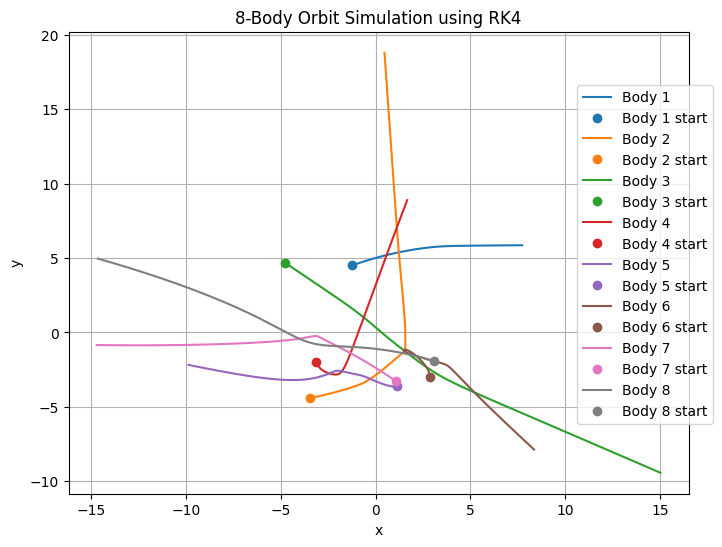

In [59]:
t0, tf, h = 0.0, 10.0, 0.01
N_bodies = 8
np.random.seed(42)
initial_conditions = [
    {'x0': np.array(np.random.uniform(-5.0, 5.0, 2)),
     'v0': np.array(np.random.uniform(-2.5, 2.5, 2)),
     'mass': np.random.uniform(0.5, 1, 1)[0]}
    for _ in range(N_bodies)]
x_traj, time = run_simulation(t0, tf, h, initial_conditions)
